In [1]:
!pip install pandas
!pip install textblob
!pip install nltk
!pip install scikit-learn
!pip install matplotlib
!pip install imbalanced-learn
!pip install wordcloud


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.over_sampling import SMOTE
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [3]:
# Carregando os dados
data = pd.read_csv('../sentimentos.csv')
data.head()

,Review,Username,Rating,NegativeRating,NeutralRatings,PositiveFeeling,AppName
0,Crashed too often. Confusing. It shows for ex....,Ayşegül Apaydiner,1,1,0,0,sentimentos
1,It only looks like the legit app but does none...,Harold Galbreath,1,1,0,0,sentimentos
2,"I have a limited data plan, so I figured that ...",A Google user,2,1,0,0,sentimentos
3,This app is not working at all. As soon as I c...,Shounak Basu,1,1,0,0,sentimentos
4,"Google GO apps are garbage. They load slow, cr...",Some Guy,1,1,0,0,sentimentos


In [4]:
# Converting numerical ratings into sentiments
data['Sentiment'] = data['Rating'].apply(lambda rating : '+1' if rating > 3 else '-1' if rating < 3 else '0')

In [5]:
# Filling NaN values with an empty string
data['Review'] = data['Review'].fillna('')

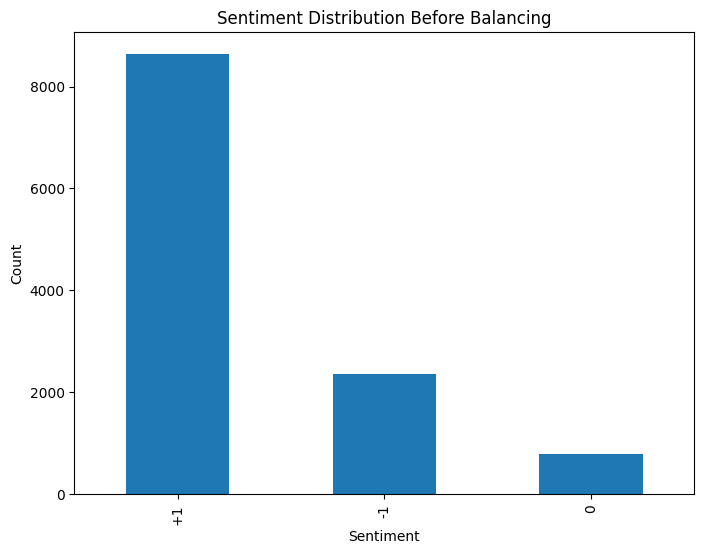

In [6]:
# Plotting sentiment distribution before balancing
plt.figure(figsize=(8,6))
data['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Distribution Before Balancing')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [7]:
# Define the stop words
stop_words = set(stopwords.words('english'))

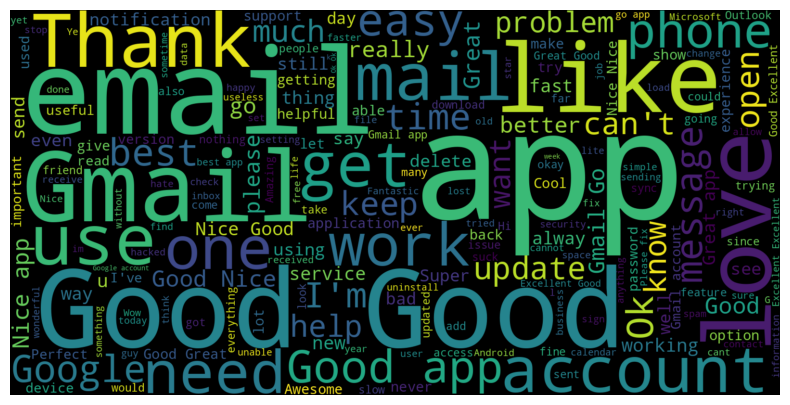

In [8]:
# Generate a word cloud to visualize the most frequently appearing words
wordcloud = WordCloud(stopwords=stop_words, background_color="black", width=1600, height=800).generate(" ".join(data['Review'].astype(str)))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
# Transforming the reviews into vectors
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['Review'])
y = data['Sentiment']

In [10]:
# Applying SMOTE resampling to balance the data
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X, y)

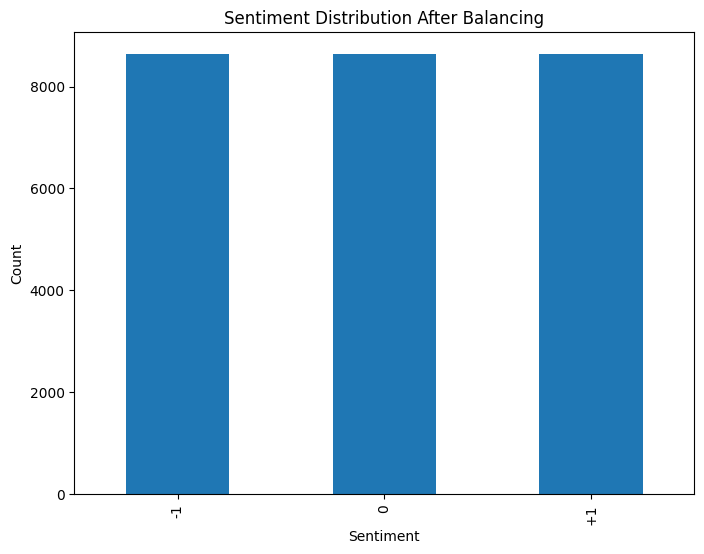

In [11]:
# Plotting sentiment distribution after balancing
plt.figure(figsize=(8,6))
pd.Series(y_sm).value_counts().plot(kind='bar')
plt.title('Sentiment Distribution After Balancing')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [12]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)

In [13]:
# Training a Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
# Evaluating the model
accuracy = model.score(X_test, y_test)
print('Model Accuracy:', accuracy)

Model Accuracy: 0.6104999034935341


In [15]:
# Validando os texto
def predict_sentiment(text):
    # Transforming the text
    text_vector = vectorizer.transform([text])
    
    # Predicting sentiment
    sentiment = model.predict(text_vector)
    
    # Mapping the output to the corresponding sentiment
    sentiment_dict = {'-1': 'Negative', '0': 'Neutral', '+1': 'Positive'}
    return sentiment_dict[sentiment[0]]

In [16]:
print(predict_sentiment("This app is amazing! I love it."))  # This should print "Positive"
print(predict_sentiment("The app is okay, could be better."))  # This should print "Neutral"
print(predict_sentiment("I don't like this app. It's buggy and crashes a lot."))  # This should print "Negative"

Positive
Neutral
Negative
